In [1]:
%load_ext autoreload
%autoreload 2
# import re
import xgboost as xgb
import sys,os
import json
import pickle
import numpy as np
import requests
import pandas as pd

In [7]:
import matplotlib as mpl
import pylab as plt
%matplotlib inline 



In [8]:
wiki_id = 'simplewiki'
N_random = 1000
PATH_DATA = "../../data/{0}/testing/{0}.number-recs-random_{1}.json".format(wiki_id, N_random)

In [9]:
with open(PATH_DATA,'r') as fin:
    for line in fin:
        dict_page_lenrec = json.loads(line)

In [10]:
list_threshold = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


In [11]:
pageids = pickle.load(open("../../data/{0}/{0}.pageids.pkl".format(wiki_id), "rb"))
N_pages = len(pageids)
N_pages

169558

In [12]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'int'

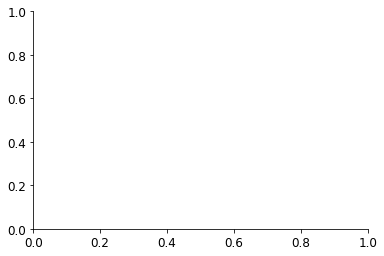

In [13]:
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))



list_r = [1,5,10]


df = pd.DataFrame(index=[">=%s"%h for h in list_r],columns=list_threshold)
df2 = pd.DataFrame(index=[">=%s"%h for h in list_r],columns=list_threshold)


for i_r,r in enumerate(list_r):
    arr_nr_cum = 0.0*np.array(list_threshold)
    for page_title, page_lenrec in dict_page_lenrec.items():
        n = 1.0*(np.array(page_lenrec)>=r)
        arr_nr_cum += n
    
    
    x = list_threshold
    y = arr_nr_cum / N_random
    ax.plot(x,y,lw=2,label="r = %s"%r,marker="o")

    df.iloc[i_r,:] = y
    z = [int(N_pages*h) for h in y]
    df2.iloc[i_r,:] = [ "%.3f"%(y[i])+"\n ({:,})".format(z[i]) for i in range(len(y)) ]

ax.legend(loc="upper right")
ax.set_xlabel("Threshold parameter")
ax.set_ylabel("Fraction of articles")
ax.set_title("Articles with at least r recommendations [%s]"%wiki_id)
ax.set_ylim(0,0.5)
plt.savefig('tmp.pdf')

In [14]:
df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
>=1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>=5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>=10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(df2)

      0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
>=1   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
>=5   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
>=10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN


In [139]:
df_all = pd.DataFrame()
list_wiki_id = ["arwiki","bnwiki","cswiki","viwiki","dewiki","ptwiki","simplewiki"]
list_threshold = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

N_random = 1000

list_r = [1,5,10]
list_threshold = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


for wiki_id in list_wiki_id:
    PATH_DATA = "../../data/{0}/testing/{0}.number-recs-random_{1}.json".format(wiki_id, N_random)
    with open(PATH_DATA,'r') as fin:
        for line in fin:
            dict_page_lenrec = json.loads(line)
    pageids = pickle.load(open("../../data/{0}/{0}.pageids.pkl".format(wiki_id), "rb"))
    N_pages = len(pageids)
    
    


    df = pd.DataFrame(index=[">=%s"%h for h in list_r],columns=list_threshold)
    df2 = pd.DataFrame(index=[">=%s"%h for h in list_r],columns=list_threshold)


    for i_r,r in enumerate(list_r):
        arr_nr_cum = 0.0*np.array(list_threshold)
        for page_title, page_lenrec in dict_page_lenrec.items():
            n = 1.0*(np.array(page_lenrec)>=r)
            arr_nr_cum += n


        x = list_threshold
        y = arr_nr_cum / N_random
        df.iloc[i_r,:] = y
        z = np.array([int(N_pages*h) for h in y])
        df2.iloc[i_r,:] = [ "%.3f"%(y[i])+"\n ({:,})".format(z[i]) for i in range(len(y)) ]
        
        s =  ["%.3f"%(y[i]) for i in range(len(y))]
        df_all=df_all.append(pd.DataFrame(s).T)
        s =  ["{:,}".format(z[i]) for i in range(len(z))]
        df_all=df_all.append(pd.DataFrame(s).T)

In [140]:
df_all

,0,1,2,3,4,5,6,7,8,9
0,0.554,0.424,0.401,0.381,0.352,0.325,0.295,0.236,0.122,0.045
0,"585,898","448,413","424,089","402,937","372,267","343,713","311,985","249,588","129,024","47,591"
0,0.186,0.162,0.133,0.111,0.089,0.069,0.048,0.029,0.006,0.000
0,"196,709","171,327","140,658","117,391","94,124","72,972","50,763","30,669","6,345",0
0,0.118,0.104,0.080,0.059,0.040,0.023,0.017,0.008,0.000,0.000
0,"124,794","109,988","84,606","62,397","42,303","24,324","17,978","8,460",0,0
0,0.738,0.697,0.668,0.613,0.548,0.421,0.275,0.157,0.092,0.009
0,"68,191","64,403","61,723","56,641","50,635","38,900","25,410","14,506","8,500",831
0,0.282,0.242,0.207,0.145,0.083,0.034,0.006,0.002,0.000,0.000
0,"26,057","22,361","19,127","13,398","7,669","3,141",554,184,0,0


In [19]:
df_all = pd.DataFrame()
list_wiki_id = ["arwiki","bnwiki","cswiki","viwiki","dewiki","ptwiki","simplewiki"]
list_threshold = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

N_random = 1000

list_r = [5]
list_threshold = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


for wiki_id in list_wiki_id:
    dict_page_lenrec = {}
    PATH_DATA = "../../data/{0}/testing/{0}.number-recs-random_{1}.json".format(wiki_id, N_random)
    with open(PATH_DATA,'r') as fin:
        for line in fin:
            x = json.loads(line)
            dict_page_lenrec[x['page']] = x['nrec']
    pageids = pickle.load(open("../../data/{0}/{0}.pageids.pkl".format(wiki_id), "rb"))
    N_pages = len(pageids)
    
    


    df = pd.DataFrame(index=[">=%s"%h for h in list_r],columns=list_threshold)
    df2 = pd.DataFrame(index=[">=%s"%h for h in list_r],columns=list_threshold)


    for i_r,r in enumerate(list_r):
        arr_nr_cum = 0.0*np.array(list_threshold)
        for page_title, page_lenrec in dict_page_lenrec.items():
            n = 1.0*(np.array(page_lenrec)>=r)
            arr_nr_cum += n


        x = list_threshold
        y = arr_nr_cum / N_random
        df.iloc[i_r,:] = y
        z = np.array([int(N_pages*h) for h in y])
        df2.iloc[i_r,:] = [ "%.3f"%(y[i])+"\n ({:,})".format(z[i]) for i in range(len(y)) ]
        
        s =  ["%.3f"%(y[i]) for i in range(len(y))]
        df_all=df_all.append(pd.DataFrame(s).T)
        s =  ["{:,}".format(z[i]) for i in range(len(z))]
        df_all=df_all.append(pd.DataFrame(s).T)

In [21]:
df_all

,0,1,2,3,4,5,6,7,8,9
0,0.186,0.162,0.133,0.111,0.089,0.069,0.048,0.029,0.006,0.000
0,"196,709","171,327","140,658","117,391","94,124","72,972","50,763","30,669","6,345",0
0,0.282,0.242,0.207,0.145,0.083,0.034,0.006,0.002,0.000,0.000
0,"26,057","22,361","19,127","13,398","7,669","3,141",554,184,0,0
0,0.498,0.448,0.384,0.328,0.265,0.175,0.092,0.039,0.000,0.000
0,"228,964","205,976","176,551","150,804","121,838","80,459","42,298","17,930",0,0
0,0.097,0.087,0.072,0.050,0.036,0.020,0.011,0.003,0.000,0.000
0,"121,431","108,912","90,134","62,593","45,067","25,037","13,770","3,755",0,0
0,0.584,0.526,0.493,0.444,0.381,0.299,0.189,0.107,0.046,0.005
0,"1,439,065","1,296,145","1,214,827","1,094,084","938,842","736,782","465,725","263,664","113,351","12,320"
